In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as py
import seaborn as sns

In [2]:
df = pd.read_csv('Housing1.csv')

In [3]:
df.describe()

,plotsize,bedrooms,bathrms,stories,price
count,49.000000,49.000000,49.000000,49.000000,49.000000
mean,4249.326531,2.714286,1.183673,1.653061,53288.775510
std,1331.222251,0.790569,0.441280,0.778648,16434.108539
min,1700.000000,1.000000,1.000000,1.000000,27000.000000
25%,3300.000000,2.000000,1.000000,1.000000,42000.000000
50%,4000.000000,3.000000,1.000000,2.000000,48000.000000
75%,4960.000000,3.000000,1.000000,2.000000,65900.000000
max,8580.000000,5.000000,3.000000,4.000000,92000.000000


In [4]:
df.head()

,plotsize,bedrooms,bathrms,stories,price
0,5850,3,1,2,42000
1,4000,2,1,1,38500
2,3060,3,1,1,49500
3,6650,3,1,2,60500
4,6360,2,1,1,61000


In [5]:
df.shape

(49, 5)

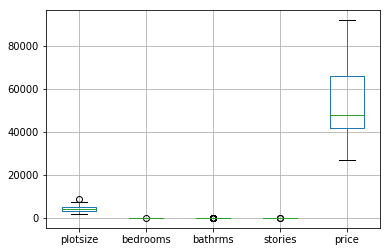

In [6]:
df.boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000143B860A470>,
      dtype=object)

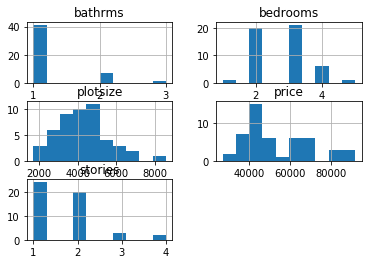

In [7]:
df.hist()

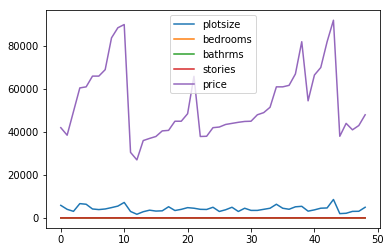

In [8]:
df.plot()

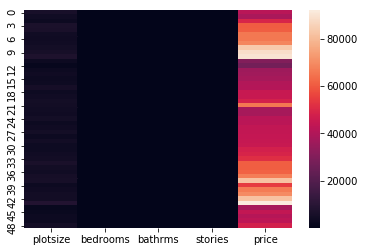

In [9]:
sns.heatmap(df)

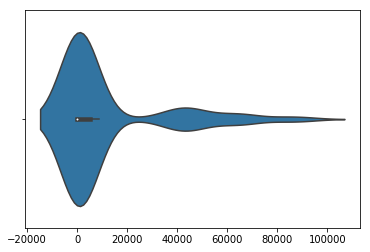

In [10]:
sns.violinplot(df)

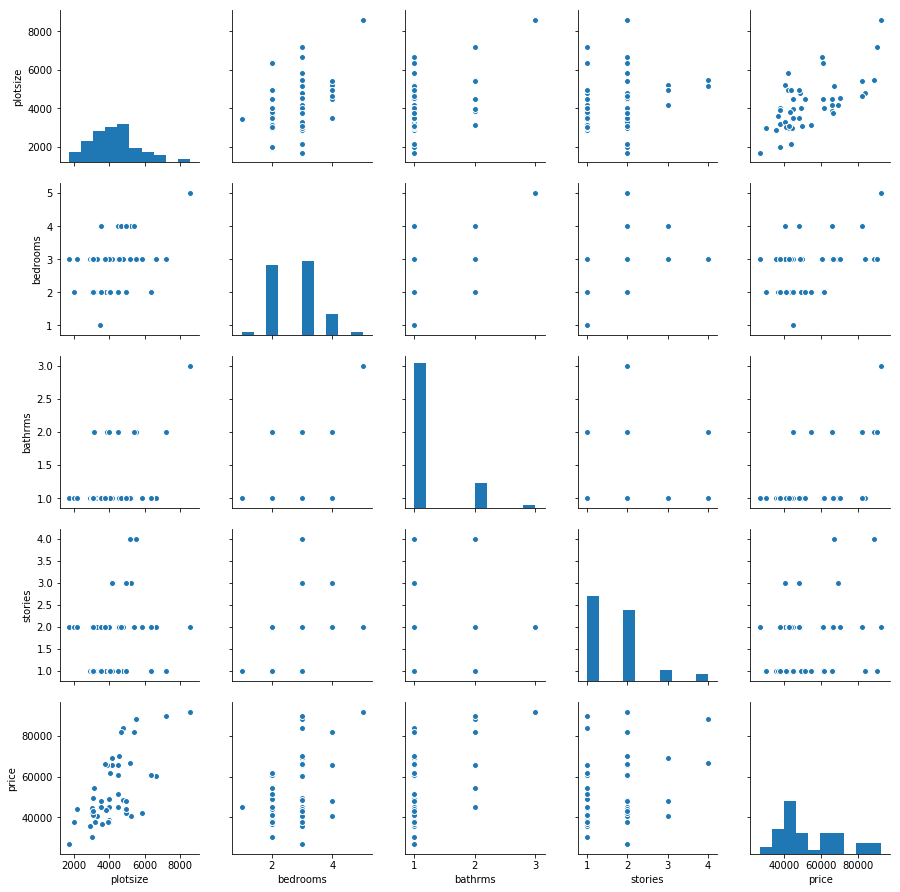

In [11]:
sns.pairplot(df)

In [12]:
label = df['price']

In [13]:
label.describe()

count       49.000000
mean     53288.775510
std      16434.108539
min      27000.000000
25%      42000.000000
50%      48000.000000
75%      65900.000000
max      92000.000000
Name: price, dtype: float64

In [14]:
df = df.drop('price',axis=1)

In [15]:
df.head()

,plotsize,bedrooms,bathrms,stories
0,5850,3,1,2
1,4000,2,1,1
2,3060,3,1,1
3,6650,3,1,2
4,6360,2,1,1


In [16]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df,label, random_state=1)

C:\Users\Nome\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [17]:
X_train.shape

(36, 4)

In [18]:
y_train.shape

(36,)

In [19]:
X_test.shape

(13, 4)

In [20]:
y_test.shape

(13,)

In [21]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()

model = linreg.fit(X_train, y_train)

In [22]:
predicted = model.predict(X_test)

In [23]:
predicted

array([54111.89735681, 67102.14958422, 50795.76596769, 60547.19831513,
       40860.92044265, 69086.45589676, 55070.2364461 , 54129.44268333,
       37850.64690685, 43955.04187234, 47139.54106781, 69632.95340977,
       63441.44561445])

In [24]:
y_test

27    44000
34    61000
39    54500
48    48000
2     49500
3     60500
42    82000
29    44900
45    44000
30    45000
31    48000
38    82000
21    65900
Name: price, dtype: int64

In [25]:
from sklearn.metrics import r2_score
print(r2_score(y_test,predicted))

0.3326645881674831


In [26]:
from sklearn import metrics
metrics.mean_absolute_error(y_test,predicted)

8363.891700660357

In [27]:
print('Coefficients: \n', model.coef_) 

Coefficients: 
 [ 6.95675033e+00 -3.31512837e+01  9.27558671e+03  3.25080176e+03]


In [28]:
print('Variance score: {}'.format(model.score(X_test, y_test)))

Variance score: 0.3326645881674831


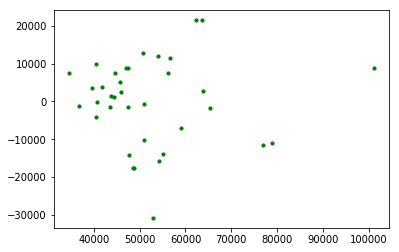

In [29]:
py.scatter(model.predict(X_train), model.predict(X_train) - y_train, 
            color = "green", s = 10, label = 'Train data') 

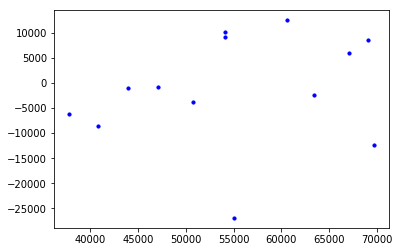

In [30]:
py.scatter(model.predict(X_test), model.predict(X_test) - y_test, 
            color = "blue", s = 10, label = 'Train data') 

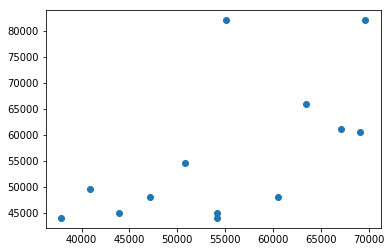

In [31]:
py.scatter(predicted,y_test)

[]

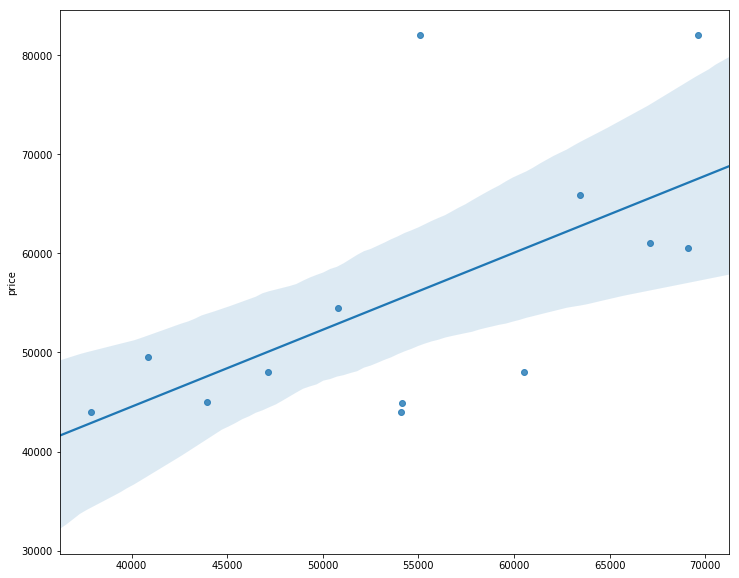

In [32]:
py.figure(figsize=(12,10))
sns.regplot(predicted,y_test)
py.plot()